In [229]:
#imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import warnings as w
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel


## Load Data

In [280]:
# load data
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

#creates a dataframe from the numpy ndarrays generated above
df_X_train = pd.DataFrame(X_train, columns=col_names)
df_X_ivs = pd.DataFrame(X_ivs, columns=col_names)
df_y_train = pd.DataFrame(y_train)

#info
print(df_X_train.info())
print(df_X_ivs.info())
print("\n",df_y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 119.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 13.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7337 non-null   float64
dtypes: float64(1)
memory usage: 57.4 KB

 None


In [33]:
df_X_train 

#D0 to D42 43 columns 
# FP44 to FP2088 

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)


In [297]:
# Print all the rows
def print_full (dataset, n_rows):
        # set display option to show all rows
        pd.set_option('display.max_rows', None)
        # set display option to show all columns
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)

        print (f"dataset \n {dataset.head(n_rows)}")
        
        # reset display option to default
        pd.reset_option('display.max_rows')
        pd.reset_option('display.max_columns')
        pd.reset_option('display.width')

In [255]:
#check for duplicates
print("Number of Duplicates train set:",df_X_train.duplicated().sum())

#check for missing values
print("Missing Values train set:",df_X_train.isnull().sum().sum())




Number of Duplicates train set: 321
Missing Values train set: 0


In [23]:
#statistical info of the data
df_X_train.describe()

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
count,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,...,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000
mean,430.518010,431.037078,5.430285,1.206897,6.527327,1.128799,4.678070,30.497615,59.165190,6.594930,...,0.396211,0.036800,0.031075,0.088456,0.027668,0.011040,0.018264,0.038026,0.094725,0.036800
std,181.613020,181.757699,4.160569,2.527815,5.983082,2.218665,2.789156,12.882724,25.749585,4.403703,...,0.489143,0.188283,0.173533,0.283976,0.164031,0.104497,0.133912,0.191273,0.292855,0.188283
min,135.068414,135.166000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,357.124405,357.429000,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,419.107040,419.500000,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,472.228141,472.888000,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,65.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3768.848446,3771.262000,92.000000,47.000000,137.000000,42.000000,58.000000,266.000000,527.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_y_train.describe()

,0
count,7337.000000
mean,0.388388
std,0.276656
min,0.000000
25%,0.169187
50%,0.382177
75%,0.581929
max,1.000000


In [281]:
# first 43 columns D column name until the first FP column name
df_X_train_D = df_X_train.iloc[:, :43]

# from the first FP column till the end
df_X_train_FP = df_X_train.iloc[:, 43:]

# first 43 columns D column name until the first FP column name
df_X_ivs_D = df_X_ivs.iloc[:, :43]

# from the first FP column till the end
df_X_ivs_FP = df_X_ivs.iloc[:, 43:]

print(df_X_train_D.info())
print(df_X_ivs_D.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D00     7337 non-null   float64
 1   D01     7337 non-null   float64
 2   D02     7337 non-null   float64
 3   D03     7337 non-null   float64
 4   D04     7337 non-null   float64
 5   D05     7337 non-null   float64
 6   D06     7337 non-null   float64
 7   D07     7337 non-null   float64
 8   D08     7337 non-null   float64
 9   D09     7337 non-null   float64
 10  D10     7337 non-null   float64
 11  D11     7337 non-null   float64
 12  D12     7337 non-null   float64
 13  D13     7337 non-null   float64
 14  D14     7337 non-null   float64
 15  D15     7337 non-null   float64
 16  D16     7337 non-null   float64
 17  D17     7337 non-null   float64
 18  D18     7337 non-null   float64
 19  D19     7337 non-null   float64
 20  D20     7337 non-null   float64
 21  D21     7337 non-null   float64
 22  

### Histograms


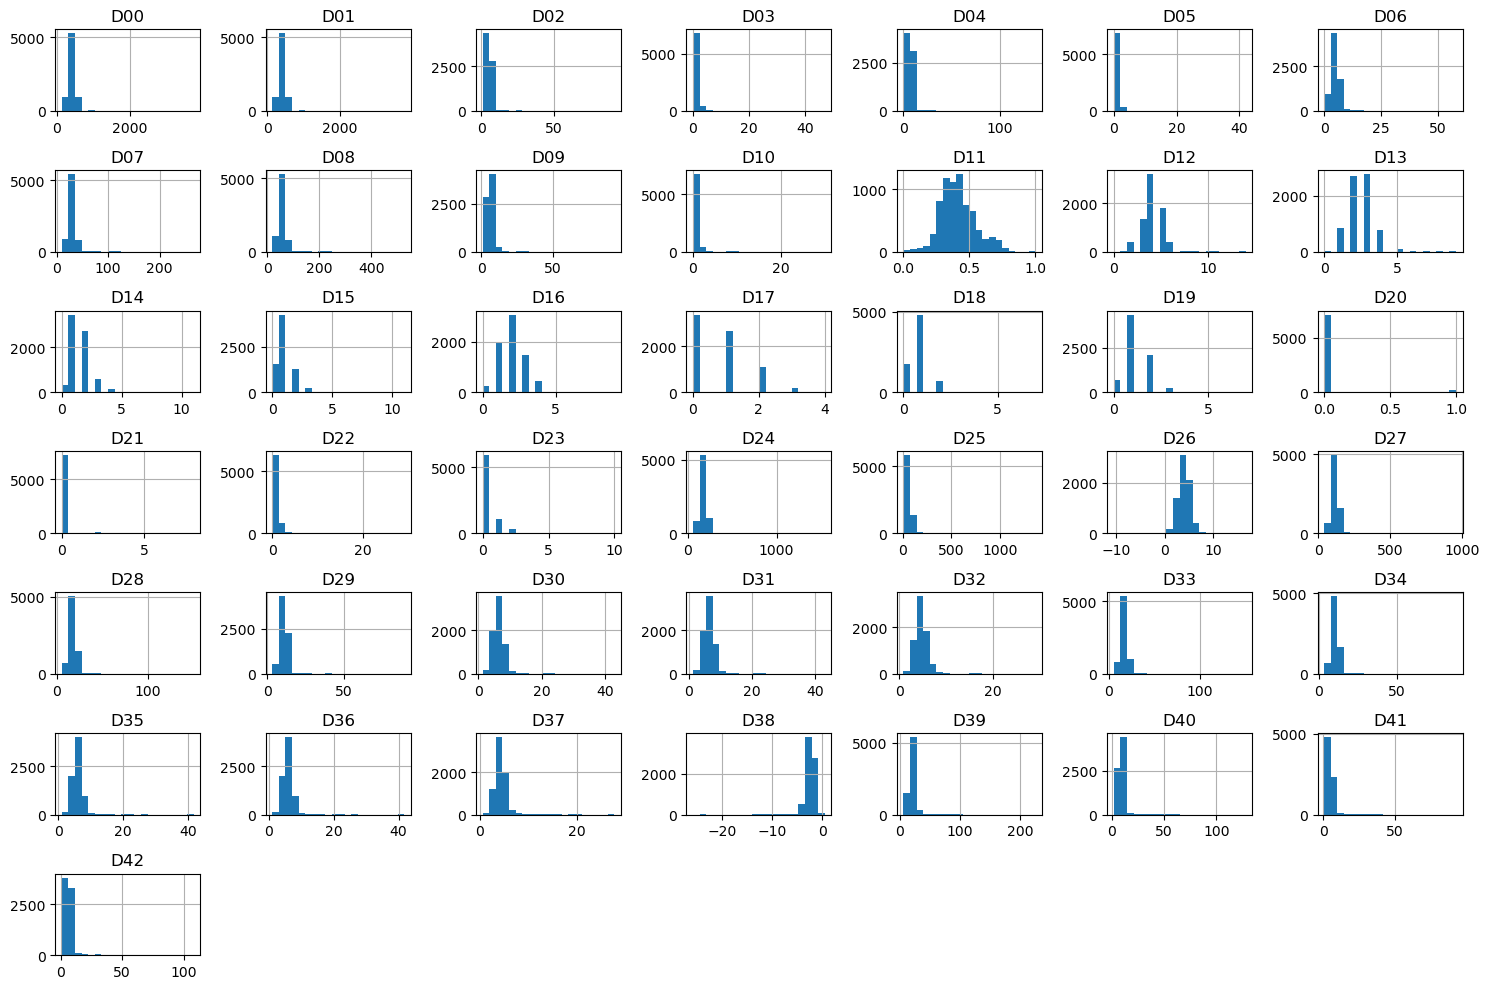

In [47]:
df_X_train_D.hist(bins=20, figsize=(15, 10))
plt.tight_layout() 
plt.show()

Observations:
* We can observe that the columns 'D12' to 'D22' might be categorical

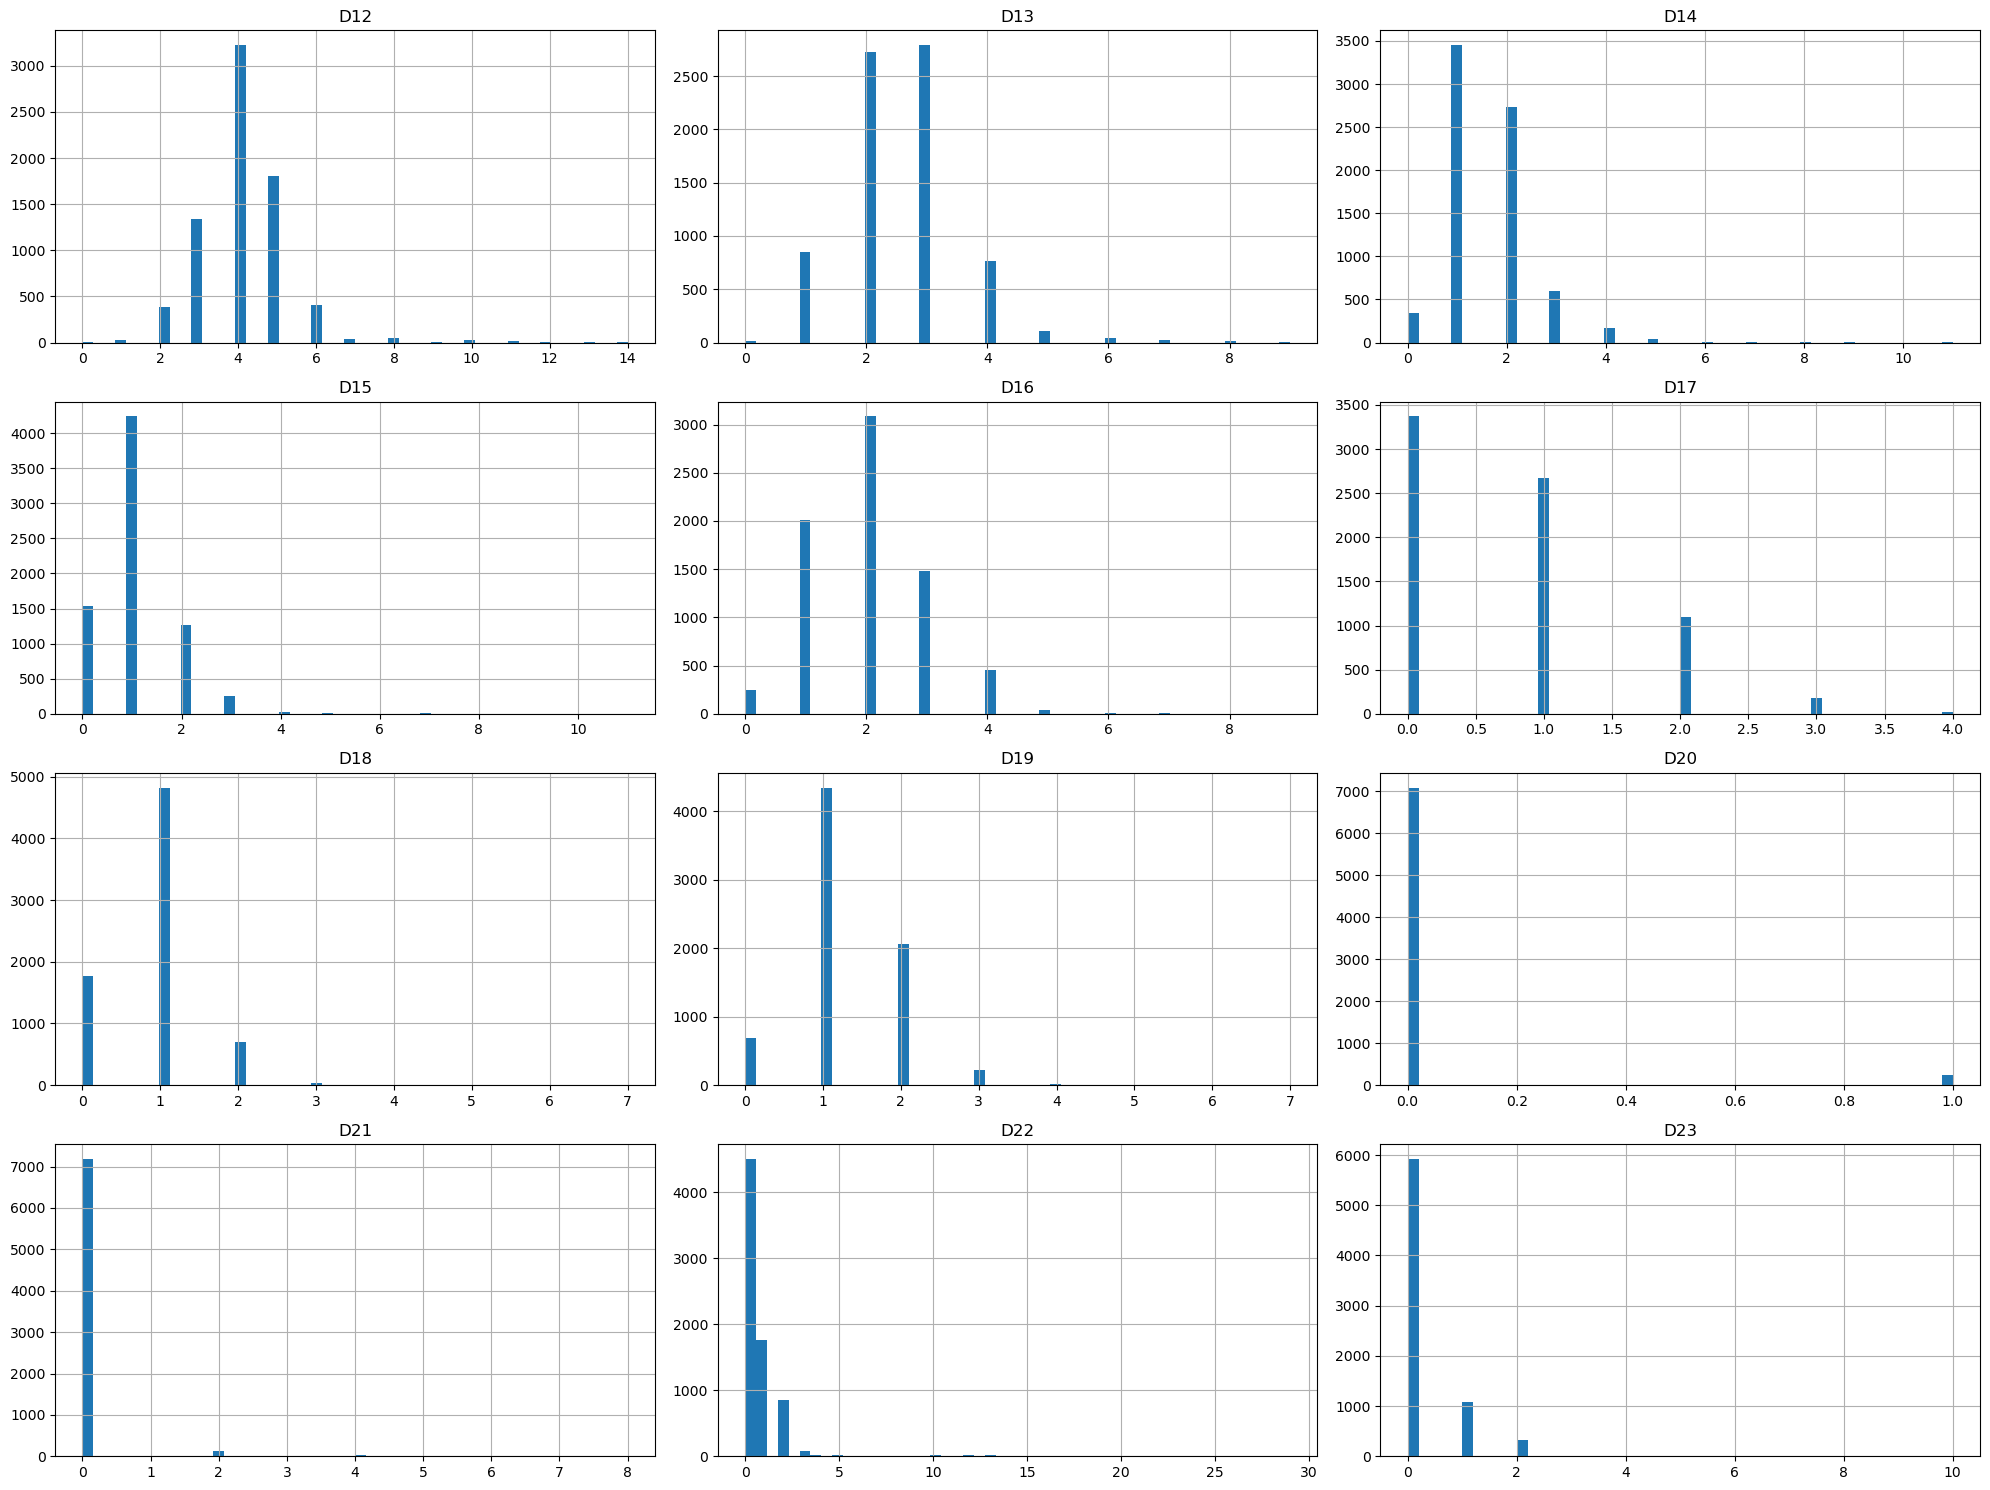

In [72]:
#select columns to plot
columns_to_plot = ['D12', 'D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23']

fig, ax = plt.subplots(figsize=(20, 15))
#ignore warnings
w.filterwarnings('ignore')
df_X_train_D[columns_to_plot].hist(ax=ax, bins=50)
ax.set_title('Histogram of D12 to  D23 Features')
plt.tight_layout() 
plt.show()


After a closer look we can definitely say that all columns except for column 'D22' are categorical.

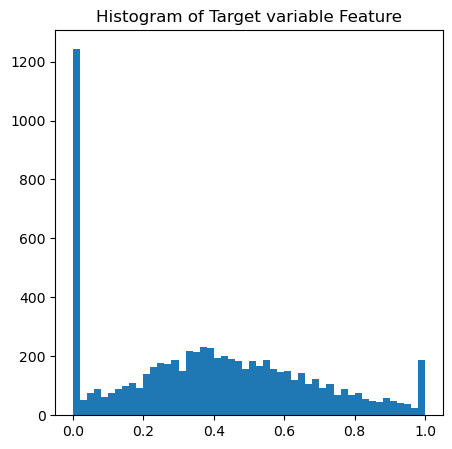

In [70]:
#histogram of the target variable

hist, bin_edges = np.histogram(df_y_train, bins=50)
plt.figure(figsize=(5,5))
plt.hist(df_y_train, bins=50)
plt.title('Histogram of Target variable Feature')
plt.show()

### Check for Outliers
Identify outliers and anomalies in the data.

In [73]:
#calculate the z-score for each point of the training set
z_scores = np.abs((df_X_train_D - df_X_train_D.mean()) / df_X_train_D.std())

#define a threshold value
threshold = 3 # its considered an outiler when the value of the point is 3 * mean of the training set, so the threshold is 3

#Identify the outliers
outliers = df_X_train_D[z_scores > threshold]

#Count the number of outliers
num_outliers = outliers.count().sum()


print(f"outliers \n {outliers} \n") # non null values represent the outliers
print(f"outliers count \n {num_outliers} \n")

outliers 
               D00       D01   D02   D03  D04   D05   D06    D07    D08   D09  \
0             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
1             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
2             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
3     1455.763803  1456.831  27.0  19.0  NaN  17.0  16.0  105.0  206.0  28.0   
4             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
...           ...       ...   ...   ...  ...   ...   ...    ...    ...   ...   
7332          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7333          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7334          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7335          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7336          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   

      ...        D33        

## Data processing


In [282]:
def remove_duplicates(d1, d2):
    #cant remove directly the duplicates of the training set because the data is already divided
    #joining the x_train_D and the y_train dataframe to remove the duplicates in a secure way
    df = pd.concat([d1, d2], axis = 1)
    df.rename(columns = { 0 :'Target'}, inplace=True) # renaming the y_train column
    print("Total duplicates:", df.duplicated().sum())

    df.drop_duplicates(inplace=True) 

    print("Total duplicates after removing:", df.duplicated().sum())
    return df

In [283]:
#separating the df without duplicates into x_train and y_train again
df = remove_duplicates(df_y_train,df_X_train_D)
df_y_train = df['Target']
df_X_train_D = df.drop(columns= ['Target'])

print(df_y_train.info())
print(df_X_train_D.info())

df = remove_duplicates(df_y_train,df_X_train_FP)
#df_y_train = df['Target']
df_X_train_FP = df.drop(columns= ['Target'])

print("\n",df_X_train_FP.info())


df = remove_duplicates(df_y_train,df_X_train)
#df_y_train = df['Target']
df_X_train = df.drop(columns= ['Target'])

print("\n",df_X_train.info())



Total duplicates: 29
Total duplicates after removing: 0
<class 'pandas.core.series.Series'>
Int64Index: 7308 entries, 0 to 7336
Series name: Target
Non-Null Count  Dtype  
--------------  -----  
7308 non-null   float64
dtypes: float64(1)
memory usage: 114.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7308 entries, 0 to 7336
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D00     7308 non-null   float64
 1   D01     7308 non-null   float64
 2   D02     7308 non-null   float64
 3   D03     7308 non-null   float64
 4   D04     7308 non-null   float64
 5   D05     7308 non-null   float64
 6   D06     7308 non-null   float64
 7   D07     7308 non-null   float64
 8   D08     7308 non-null   float64
 9   D09     7308 non-null   float64
 10  D10     7308 non-null   float64
 11  D11     7308 non-null   float64
 12  D12     7308 non-null   float64
 13  D13     7308 non-null   float64
 14  D14     7308 non-null   float

In [284]:
#create dummies to change the columns from numeric to categorical, adding a column for each value
def dummies_for_columns(dataframe, columns_to_change):

    for col in columns_to_change:
        dataframe = pd.concat([dataframe,pd.get_dummies(dataframe[col], prefix= col)], axis = 1)
        dataframe.drop(columns = [col], inplace= True)

    return dataframe

In [285]:
# numeric columns to change to categorical 
columns_to_dummies = ['D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D23']

# i have to concat the train and ivs dataframes to ensure the same columns 
df_X_D_combined = pd.concat([df_X_train_D, df_X_ivs_D], axis = 0)#axis = 0 to concatenate vertically(along rows)

df_X_D_combined = dummies_for_columns(df_X_D_combined, columns_to_dummies)

print(df_X_D_combined.info())

# i have to concat the train and ivs dataframes to ensure the same columns 
df_X_combined = pd.concat([df_X_train, df_X_ivs], axis = 0)#axis = 0 to concatenate vertically(along rows)

df_X_combined = dummies_for_columns(df_X_combined, columns_to_dummies)

print(df_X_combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 815
Columns: 121 entries, D00 to D23_10.0
dtypes: float64(32), uint8(89)
memory usage: 2.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8153 entries, 0 to 815
Columns: 2210 entries, D00 to D23_10.0
dtypes: float64(2121), uint8(89)
memory usage: 132.7 MB
None


In [286]:
#separating the combined x_train and x_ivs dataframe into 2 different dataframes again
df_X_train_D = df_X_D_combined.iloc[:len(df_X_train_D),:]# first 7308 rows
df_X_ivs_D = df_X_D_combined.iloc[len(df_X_train_D):,:]# last 816 rows

print(df_X_train_D.info())
print(df_X_ivs_D.info())

#separating the combined x_train and x_ivs dataframe into 2 different dataframes again
df_X_train = df_X_combined.iloc[:len(df_X_train),:]
df_X_ivs = df_X_combined.iloc[len(df_X_train):,:]

print(df_X_train.info())
print(df_X_ivs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7308 entries, 0 to 7336
Columns: 121 entries, D00 to D23_10.0
dtypes: float64(32), uint8(89)
memory usage: 2.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Columns: 121 entries, D00 to D23_10.0
dtypes: float64(32), uint8(89)
memory usage: 281.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7337 entries, 0 to 6884
Columns: 2210 entries, D00 to D23_10.0
dtypes: float64(2121), uint8(89)
memory usage: 119.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Columns: 2210 entries, D00 to D23_10.0
dtypes: float64(2121), uint8(89)
memory usage: 13.3 MB
None


### Feature Selection


#### Looking for correlations
Should be in the EDA section but we need the data cleaned which means it needs to be after the data processing section in this case.

In [298]:
#Draws a correlation matrix
def draw_correlation_matrix (corr,cols):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(cols),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(cols, fontsize=4)
    ax.set_yticklabels(cols, fontsize=4)
    plt.show()


# Return correlation matrix
def corr_target(d_X_train,d_y_train,n_corr):
    # joining the x_train dataframe with the y_train dataframe
    df = pd.concat([d_y_train, d_X_train], axis = 1)
    df.rename(columns = { 0 :'Target'}, inplace=True) # renaming the y_train column

    #creates a matrix of correlations
    corr_matrix = df.corr() 
    #how much each attribute correlates with the target variable value, the lower the value the least relevant the feature is
    print("\nCorrelations Matrix\n")
    df_corr = corr_matrix['Target'].sort_values(ascending=False)
    print_full(df_corr,n_corr)
    return corr_matrix

In [299]:
# correlates each column with target (y)
corr_matrix = corr_target (df_X_train,df_y_train,50)


Correlations Matrix

dataset 
 Target    1.000000
FP1011    0.290063
FP0953    0.256689
FP0521    0.247162
FP1295    0.237157
FP0310    0.236406
FP1484    0.219773
FP0683    0.215643
FP1532    0.210883
FP0427    0.205320
FP0843    0.201582
FP1242    0.195876
D32       0.188656
D30       0.186793
D31       0.186793
FP0503    0.185768
FP1665    0.179645
FP0033    0.179407
FP1497    0.178894
D29       0.177845
D35       0.176852
D36       0.176852
D37       0.176542
FP1701    0.175563
D34       0.171417
FP1452    0.170094
FP1221    0.168713
FP0577    0.167194
D27       0.166784
FP1496    0.165942
D08       0.164762
FP1123    0.163912
D28       0.162416
FP0203    0.162370
FP0580    0.161414
FP0409    0.161263
D24       0.160397
FP0939    0.159281
D01       0.159275
D00       0.159241
FP0451    0.158694
D33       0.158435
D07       0.156780
FP0395    0.153252
FP1912    0.152455
FP0009    0.152317
D04       0.152123
FP1879    0.151005
FP1821    0.150456
FP1125    0.149959
Name: Target, dtyp

In [303]:
#How much each attribute correlates with each other: All D columns
corr_matrix = df_X_train_D.corr()

# Get the top x pairs with the highest correlation coefficients (The first x pair is the same column)
top_pairs = (corr_matrix.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={0: 'correlation'})
             .query('level_0 != level_1')
             .iloc[:50])

print_full(top_pairs,50)

dataset 
       level_0   level_1  correlation
1    D12_12.0   D18_6.0     1.000000
3    D12_14.0   D13_9.0     1.000000
5    D12_13.0   D21_8.0     1.000000
6    D12_13.0   D14_9.0     1.000000
8    D12_12.0   D19_6.0     1.000000
9    D12_12.0   D16_9.0     1.000000
22    D14_7.0   D15_7.0     1.000000
24    D14_6.0   D15_6.0     1.000000
32    D13_9.0  D12_14.0     1.000000
40        D30       D31     1.000000
57        D31       D30     1.000000
69        D36       D35     1.000000
70        D35       D36     1.000000
76    D14_8.0   D15_8.0     1.000000
77    D14_9.0  D12_13.0     1.000000
79    D19_6.0   D16_9.0     1.000000
80    D19_6.0  D12_12.0     1.000000
87    D18_7.0   D19_7.0     1.000000
89    D18_6.0   D19_6.0     1.000000
91    D18_6.0   D16_9.0     1.000000
92    D18_6.0  D12_12.0     1.000000
94    D19_6.0   D18_6.0     1.000000
95    D19_7.0   D18_7.0     1.000000
106   D21_8.0   D14_9.0     1.000000
107   D21_8.0  D12_13.0     1.000000
118   D15_8.0   D14_8.0     

Observations: 
* FP columns have higher correlation with target (y).
* D columns are the ones who have a higher correlation between themselves

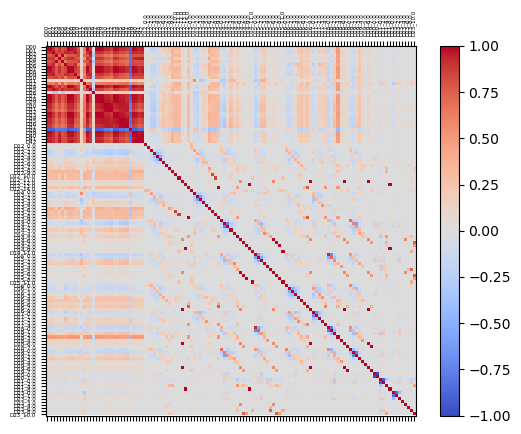

In [302]:
# Draws a correlation matrix between D pairs (43 columns)

#How much each attribute correlates with each other
corr_matrix_Ds = df_X_train_D.corr()
draw_correlation_matrix (corr_matrix_Ds, df_X_train_D.columns)


Observations: 
* The red block in the top left corner is the data without the categorization
* After the categorization we have a sparse matrix, but it has a high correlation between the categorical data represented by the red dots.

In [304]:
#How much each attribute correlates with each other: All FP columns
corr_matrix = df_X_train_FP.corr()

# Get the top x pairs with the highest correlation coefficients (The first x pair is the same column)
top_pairs = (corr_matrix.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={0: 'correlation'})
             .query('level_0 != level_1')
             .iloc[:50])

print_full(top_pairs,50)

dataset 
      level_0 level_1  correlation
2089  FP0683  FP1295     0.890647
2090  FP1295  FP0683     0.890647
2091  FP2079  FP1205     0.875261
2092  FP1205  FP2079     0.875261
2093  FP0253  FP2045     0.858472
2094  FP2045  FP0253     0.858472
2095  FP1930  FP0907     0.856070
2096  FP0907  FP1930     0.856070
2097  FP0507  FP1043     0.854318
2098  FP1043  FP0507     0.854318
2099  FP1637  FP2022     0.847494
2100  FP2022  FP1637     0.847494
2101  FP0399  FP0577     0.834274
2102  FP0577  FP0399     0.834274
2103  FP0725  FP0895     0.826847
2104  FP0895  FP0725     0.826847
2105  FP2029  FP0096     0.823009
2106  FP0096  FP2029     0.823009
2107  FP0474  FP0725     0.817763
2108  FP0725  FP0474     0.817763
2109  FP0680  FP1229     0.815282
2110  FP1229  FP0680     0.815282
2111  FP0920  FP0650     0.810754
2112  FP0650  FP0920     0.810754
2113  FP0680  FP0650     0.808601
2114  FP0650  FP0680     0.808601
2115  FP0895  FP0540     0.807143
2116  FP0540  FP0895     0.807143
2117

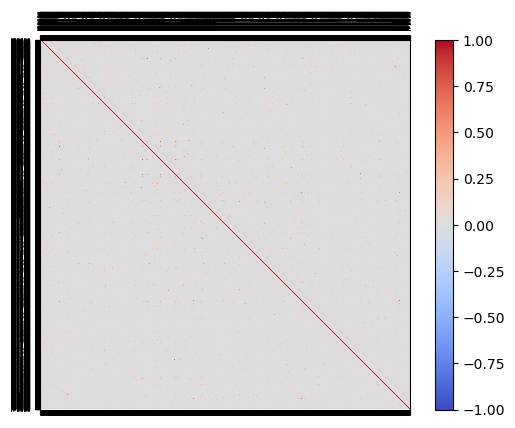

In [305]:
#Draws a correlation matrix between FP pairs

#How much each attribute correlates with each other
corr_matrix_FPs = df_X_train_FP.corr()
draw_correlation_matrix (corr_matrix_FPs, df_X_train_FP.columns)

Observations: 
* some FP columns are more correlated with y than D columns 
* FP columns are sparsed but have some correlation (sparce) with themselves

High correlation between pairs of variables does not necessarily imply that the correlation is linear. Correlation measures the strength of a linear relationship between two variables, but it does not capture non-linear relationships 1. Therefore, it is not appropriate to assume that the correlation is linear based solely on the presence of high correlations between pairs of variables.

To understand if the correlation between two variables is linear, we can plot a scatter plot of the two variables and visually inspect the relationship between them. If the relationship appears to be linear, then the correlation coefficient can be used to quantify the strength of the linear relationship. If the relationship appears to be non-linear, then other techniques such as polynomial regression or non-linear regression may be more appropriate.

In [218]:
N,M=df_X_train_D.shape#it was X_train
N,M

# Convert the DataFrame to a numpy array
X_train_array = df_X_train_D.values
y_train_array = df_y_train.values.reshape((-1, 1))

v=np.hstack((y_train_array.reshape((N,1)), X_train_array))
pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.654947,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649995,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.154947,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.616176,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.359725,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,0.000000,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7304,0.002193,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7305,0.293481,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7306,0.596804,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
pd.DataFrame(np.corrcoef(v.T))

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,1.000000,0.159241,0.159275,0.129524,0.085594,0.152123,0.096742,0.125104,0.156780,0.164762,...,0.006259,0.009271,0.070716,-0.053510,-0.035742,-0.010838,0.004572,0.023454,-0.038031,-0.026016
1,0.159241,1.000000,0.999998,0.919472,0.773032,0.888440,0.785026,0.856436,0.992778,0.973256,...,0.005408,0.014529,-0.043622,0.042485,0.015804,-0.013855,0.017546,0.003962,-0.024876,-0.010194
2,0.159275,0.999998,1.000000,0.919212,0.772855,0.888259,0.784852,0.856173,0.992635,0.973035,...,0.005417,0.014513,-0.043598,0.042440,0.015845,-0.013865,0.017531,0.003953,-0.024903,-0.010219
3,0.129524,0.919472,0.919212,1.000000,0.838464,0.863346,0.844063,0.931618,0.922578,0.905328,...,-0.018865,-0.007681,-0.030001,0.036988,-0.000318,-0.012775,0.015627,0.001588,-0.028213,-0.010864
4,0.085594,0.773032,0.772855,0.838464,1.000000,0.705072,0.993449,0.653693,0.775129,0.769548,...,-0.007383,-0.001361,-0.073533,0.090511,-0.013904,-0.004219,0.008278,-0.005582,-0.004245,0.000386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.010838,-0.013855,-0.013865,-0.012775,-0.004219,-0.012806,-0.003884,-0.013884,-0.013197,-0.011341,...,-0.001336,-0.000433,-0.053421,-0.010878,-0.005599,1.000000,-0.000306,-0.000306,-0.000750,-0.000612
118,0.004572,0.017546,0.017531,0.015627,0.008278,0.002865,0.009845,0.018093,0.018582,0.022145,...,-0.000597,-0.000194,-0.023884,-0.004864,-0.002503,-0.000306,1.000000,-0.000137,-0.000335,-0.000274
119,0.023454,0.003962,0.003953,0.001588,-0.005582,-0.002992,-0.005948,0.005524,0.004074,0.005362,...,-0.000597,-0.000194,-0.023884,-0.004864,-0.002503,-0.000306,-0.000137,1.000000,-0.000335,-0.000274
120,-0.038031,-0.024876,-0.024903,-0.028213,-0.004245,-0.012913,-0.003825,-0.034374,-0.022234,-0.017612,...,-0.001464,-0.000474,-0.058524,-0.011917,-0.006134,-0.000750,-0.000335,-0.000335,1.000000,-0.000671


#### Scaling

In [306]:
#scaling before feature selection
scaler = PowerTransformer()
#MinMaxScaler()
#StandardScaler()

scaler.fit(df_X_train_D)
df_X_train_D_scaled = scaler.transform(df_X_train_D)
df_X_ivs_scaled  = scaler.transform(df_X_ivs_D)

In [311]:
ye = pd.DataFrame(df_X_train_D_scaled, columns = df_X_train_D.columns)

ye

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,D21_4.0,D21_8.0,D23_0.0,D23_1.0,D23_2.0,D23_3.0,D23_4.0,D23_6.0,D23_8.0,D23_10.0
0,1.041981,1.040006,1.545867,0.297013,0.586399,0.329417,1.880576,1.204373,1.103579,1.143427,...,-0.051056,-0.016545,0.489801,-0.415747,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
1,0.200334,0.199018,0.103958,0.297013,0.794792,0.329417,-0.105780,0.181079,0.315331,0.040377,...,-0.051056,-0.016545,0.489801,-0.415747,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
2,-0.594703,-0.596484,-0.373436,-1.290527,-0.922113,-1.296304,-0.716147,-0.390976,-0.415992,-0.822421,...,-0.051056,-0.016545,-2.041646,2.405310,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
3,3.624692,3.624634,3.387832,2.993373,2.645926,3.068419,2.872134,3.645287,3.552400,3.308134,...,-0.051056,-0.016545,0.489801,-0.415747,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
4,-0.167490,-0.164859,-0.373436,-1.290527,-0.523342,-1.296304,-0.105780,-0.235795,-0.415992,0.040377,...,-0.051056,-0.016545,-2.041646,2.405310,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,0.535368,0.533602,0.491248,-1.290527,0.101126,-1.296304,0.376617,0.424905,0.048352,1.143427,...,-0.051056,-0.016545,0.489801,-0.415747,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
7304,-2.282479,-2.283447,-1.830624,-1.290527,-0.922113,-1.296304,-1.536719,-2.076792,-1.685526,-2.204063,...,-0.051056,-0.016545,0.489801,-0.415747,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
7305,0.843863,0.842711,-0.373436,-1.290527,0.985876,-1.296304,-0.105780,0.942887,1.271711,-0.350378,...,-0.051056,-0.016545,-2.041646,2.405310,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402
7306,-0.107064,-0.108203,-0.373436,1.008994,-0.188488,0.329417,0.376617,-0.089210,-0.023295,-0.350378,...,-0.051056,-0.016545,0.489801,-0.415747,-0.213992,-0.026166,-0.011699,-0.011699,-0.028665,-0.023402


In [224]:
#using linear regression for sequential feature selection
#lmr=DecisionTreeRegressor(max_depth = 3)
#lmr=RandomForestRegressor()
lmr=LinearRegression()
sfs = SequentialFeatureSelector(lmr, n_features_to_select=50)#,direction='backward'
sfs.fit(df_X_train_D_scaled, df_y_train)

#get the relevant columns
features=sfs.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

#nX_train=sfs.transform(X_train)
#nX_test=sfs.transform(X_test)

The features selected are columns:  [  2   4   5   7   9  10  12  14  15  16  18  21  22  23  24  26  28  36
  38  39  41  42  43  46  49  52  53  54  55  57  59  61  62  68  69  72
  78  88  89  90  92 102 103 104 107 110 111 113 119 120]


In [225]:
lmr=DecisionTreeRegressor(max_depth = 3)
sfs = SequentialFeatureSelector(lmr, n_features_to_select=50)#,direction='backward'
sfs.fit(df_X_train_D_scaled, df_y_train)

#get the relevant columns
features=sfs.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

The features selected are columns:  [  0   3   4   5   6   9  11  13  15  16  17  19  20  22  23  26  27  30
  32  35  36  38  39  40  42  47  49  50  54  55  58  63  64  67  70  71
  80  81  82  92  94  96 105 106 107 109 110 114 115 120]


In [226]:
lmr=RandomForestRegressor()
sfs = SequentialFeatureSelector(lmr, n_features_to_select=50)#,direction='backward'
sfs.fit(df_X_train_D_scaled, df_y_train)

#get the relevant columns
features=sfs.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

KeyboardInterrupt: 

In [227]:
rfr=RandomForestRegressor(random_state=0, n_jobs= -1)
rfr.fit(df_X_train_D_scaled, df_y_train)
for i, imp in enumerate(rfr.feature_importances_):
    print("Feature", i, "Importance:", imp )

Feature 0 Importance: 0.015316954848218836
Feature 1 Importance: 0.015251529049472044
Feature 2 Importance: 0.010541034635488193
Feature 3 Importance: 0.01440990448278526
Feature 4 Importance: 0.030255954025686687
Feature 5 Importance: 0.013744696780227819
Feature 6 Importance: 0.014609843468857122
Feature 7 Importance: 0.004762558048430618
Feature 8 Importance: 0.013903031862109188
Feature 9 Importance: 0.013930408599613859
Feature 10 Importance: 0.01367164492671414
Feature 11 Importance: 0.06220966873513385
Feature 12 Importance: 0.018242539211146432
Feature 13 Importance: 0.02037122578019892
Feature 14 Importance: 0.04839298187454657
Feature 15 Importance: 0.05578506746970844
Feature 16 Importance: 0.0617374779797939
Feature 17 Importance: 0.03832146715483666
Feature 18 Importance: 0.033264100486167125
Feature 19 Importance: 0.019143882015089875
Feature 20 Importance: 0.019207518543195426
Feature 21 Importance: 0.049856652845011576
Feature 22 Importance: 0.020438657010017295
Feature

In [232]:
sel = SelectFromModel(estimator=rfr, threshold=.0005) # threshold defiined to have 5 features
sel.fit(df_X_train_D_scaled, df_y_train)

print("Importances: ", sel.estimator_.feature_importances_)

print("Default threshold: ", sel.threshold_)

features=sel.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

Importances:  [1.53169548e-02 1.52515290e-02 1.05410346e-02 1.44099045e-02
 3.02559540e-02 1.37446968e-02 1.46098435e-02 4.76255805e-03
 1.39030319e-02 1.39304086e-02 1.36716449e-02 6.22096687e-02
 1.82425392e-02 2.03712258e-02 4.83929819e-02 5.57850675e-02
 6.17374780e-02 3.83214672e-02 3.32641005e-02 1.91438820e-02
 1.92075185e-02 4.98566528e-02 2.04386570e-02 2.59349848e-02
 1.65205312e-02 1.67029106e-02 3.84814448e-02 4.57975792e-02
 2.62592216e-02 2.62377473e-02 4.36715655e-02 2.84626465e-02
 8.16785538e-08 5.28748959e-04 9.37363005e-04 1.55616233e-03
 2.45216814e-03 1.90733018e-03 8.48874835e-04 1.20296448e-04
 7.56425166e-04 6.74293451e-07 8.02746621e-05 2.07368703e-05
 7.63427456e-08 0.00000000e+00 1.27815691e-05 3.17494665e-04
 1.20692358e-03 3.58267598e-03 3.16926564e-03 1.51343379e-03
 1.65529167e-03 1.11752912e-04 2.58078673e-05 3.42672732e-04
 9.69918083e-06 3.83580229e-04 2.56017366e-03 6.88462090e-03
 1.42450687e-03 1.57006403e-04 6.04978709e-05 1.09499198e-06
 4.4810506

In [236]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(df_X_train_D_scaled)
tve=0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
print()
print("Actual Eigenvalues:", pca.singular_values_)
for i,comp in enumerate(pca.components_):
    print("PC",i, "-->", comp)

PC0 - Variance explained:  0.1917 - Total Variance:  0.1917
PC1 - Variance explained:  0.0460 - Total Variance:  0.2378
PC2 - Variance explained:  0.0418 - Total Variance:  0.2795
PC3 - Variance explained:  0.0394 - Total Variance:  0.3189
PC4 - Variance explained:  0.0340 - Total Variance:  0.3529
PC5 - Variance explained:  0.0308 - Total Variance:  0.3837
PC6 - Variance explained:  0.0287 - Total Variance:  0.4124
PC7 - Variance explained:  0.0269 - Total Variance:  0.4393
PC8 - Variance explained:  0.0246 - Total Variance:  0.4639
PC9 - Variance explained:  0.0239 - Total Variance:  0.4879
PC10 - Variance explained:  0.0234 - Total Variance:  0.5113
PC11 - Variance explained:  0.0211 - Total Variance:  0.5324
PC12 - Variance explained:  0.0199 - Total Variance:  0.5522
PC13 - Variance explained:  0.0192 - Total Variance:  0.5715
PC14 - Variance explained:  0.0186 - Total Variance:  0.5901
PC15 - Variance explained:  0.0180 - Total Variance:  0.6081
PC16 - Variance explained:  0.0177

### Train Test Split


In [ ]:
#defining the X and y for the train test split
X = df.iloc[:, 1:]#all columns starting from index 1 onward
y = df.iloc[:, 0]#first column of the dataset "Class" target variable column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

X_train.info()
print("\n")
y_train.info()
print("\n")
X_test.info()
print("\n")
y_test.info()


### Scaling, Imputation and Classification models

#### Auxiliar functions

In [19]:
# Execute list of scalers, imputers,models and present the results 
def test_models (scalers, imputers,models, X_train, y_train, X_test,y_test, verbose):
    results =[]
    ct = 0
    for name_scaler, scaler in scalers:
        for name_imputer, imputer in imputers:
            for name_mod, model in models:
                #scaling
                scaler.fit(X_train)
                Xt_train = scaler.transform(X_train)
                Xt_test  = scaler.transform(X_test)

                #imputing
                imputer.fit(Xt_train)
                Xt_train = imputer.transform(Xt_train)
                Xt_test  = imputer.transform(Xt_test)


                model.fit(Xt_train, y_train)
                preds = model.predict(Xt_test) #PREDICTION

                #present model number
                if verbose:
                    ct += 1
                    print("\nModel %d" % ct)

                #save results
                results = save_results (name_scaler, scaler, name_imputer, imputer, name_mod, model, results,y_test, preds, verbose)
    
    results_sorted = sorted(results, key=lambda x: x[8], reverse=True) #f1 sorted decreasing
    display_results(results_sorted)
    return results



# Save the model scores and present intermediate results (w/ verbose)
# Returns the list with the saved results 
def save_results(name_scaler, scaler,name_imputer, imputer, name_mod, model, results, y_test, preds, verbose):

    # Calculate the precision, recall, f1 and mcc scores
    #the target variable Class has 5 different values so we need to do a weighted average for the precision, recall and f1 scores
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    mcc = matthews_corrcoef(y_test, preds)
    
    if verbose:
        print(f"Scaler: {scaler} imputer: {imputer} classifier: {name_mod} {model}")
        print("The Precision is: %7.4f" % precision)
        print("The Recall is: %7.4f" % recall)
        print("The F1 score is: %7.4f" % f1)
        print("The Matthews correlation coefficient is: %7.4f" % mcc)
        print()
        print("This is the Confusion Matrix")
        print(pd.DataFrame(confusion_matrix(y_test, preds)))


    results.append((name_scaler,
                    scaler,
                    name_imputer, 
                    imputer, 
                    name_mod, 
                    model,
                    precision,
                    recall,
                    f1,
                    mcc,                    
                    ))
    return results

# Display the model final results. Receives the ordered results to present
def display_results (results):        
    
    noshow = ""
    print (f"\n--------------------------Results for Classification Models Performance--------------------------")
    for res in results:
        name_scaler = res [0]
        scaler = res [1]
        name_imputer = res [2]
        imputer = res [3]
        name_mod = res [4]
        model = res [5]
        precision = res [6]
        recall = res [7]
        f1 = res [8]
        mcc = res [9]

        print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
        print(f"{noshow.ljust(25)} | scaler {scaler} | imputer {imputer}")  

    

In [ ]:
# Defining a list of scalers
scalers = [
    ('PowerTransformer', PowerTransformer()),
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]

# Defining a list of Imputers
imputers = [
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('KNNImputer', KNNImputer(n_neighbors=3))
]

# Defining a list of classification models
classification_models = [
    ('LogisticRegression', LogisticRegression(C = 0.01)),
    ('LogisticRegression', LogisticRegression(C = 1)),
    ('DecisionTree_maxd10', DecisionTreeClassifier(max_depth = 10)),
    ('DecisionTree_maxd20', DecisionTreeClassifier(max_depth = 20)),
    ('DecisionTree_minsl20', DecisionTreeClassifier(min_samples_leaf = 5)),
    ('DecisionTree_minsl10', DecisionTreeClassifier(min_samples_leaf = 10)),
    ('DecisionTree_critgini', DecisionTreeClassifier(criterion = 'gini')),
    ('DecisionTree_critentropy', DecisionTreeClassifier(criterion = 'entropy')),
    ('GaussianNB', GaussianNB()),
    ('KNN_K3_balltree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'ball_tree')),
    ('KNN_K3_kdtree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree')),
    ('KNN_K5_balltree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree')), 
    ('KNN_K5_kdtree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree')),
    ('KNN_K5_balltree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree',weights = 'distance')), 
    ('KNN_K5_kdtree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree',weights = 'distance'))
]


results_classification = []
VERBOSE = False # True to present/print the progress of the model performance

results_classification =  test_models (scalers, imputers, classification_models, X_train, y_train, X_test,y_test, VERBOSE)



os dados tem uumas colunas de dados normais ao inicio, e depois tem muitas colunas onde são só 0 e 1 que representam que cenas é que foram injetadas no objeto de estudo

deveremos dar scaling na primeira parte dos dados
vamos fazer tipo x= = x_train(:,:,44), dar scale nisso, e depois fazer v.stack
esta primeira parte são as primeiras 44 colunas

faz sentido fazermos um modelo só com a primeira parte? ou só com a segunda?

* scaling before feature selection
* dont forget to scale the IVS to test !!!!!!


ver se tem outliers e se faz sentido verifica los, check the z score etc and check the p2 of AAA, result of outlier was strange i gotta check the values again 
fazer o scaling ates de fazer qualquer tipo de feature selection

Data processing:
* Eliminate duplicates from training and test set
* Add dummies to remove the categorical data from the dataset
* Verify if scaling is before or after the correlations

apos as corrwlations dentro do feature selection rever o texto
